# Seasonality, Trend and Noise

Anda akan melampaui statistik ringkasan dengan mempelajari tentang autokorelasi dan plot autokorelasi parsial. Anda juga akan belajar cara mendeteksi secara musiman, tren, dan noise dalam data time series Anda.

## Autocorrelation and Partial autocorrelation

### Autocorrelation in time series data

* Autocorrelation diukur sebagai korelasi antara time series dan salinannya yang tertunda.
* Misalnya, autocorrelation `order 3` mengembalikan korelasi antara time series pada titik ( t_1 , t_2 , t_3 , ...) dan nilai-nilainya sendiri tertinggal 3 poin waktu, yaitu ( t_4 , t_5 , t_6 , ...)
* Ini digunakan untuk menemukan pola berulang atau sinyal periodik dalam time series

Adalah umum untuk menggunakan plot autocorrelation (ACF), juga dikenal sebagai self-autocorrelation, untuk memvisualisasikan autocorrelation dari suatu time-series. Fungsi `plot_acf()` di library `statsmodels` dapat digunakan untuk mengukur dan memplot autocorrelation time-series.

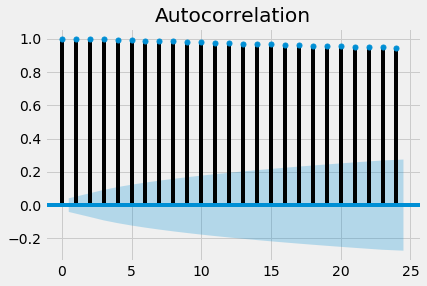

In [63]:
# Import required libraries
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import pandas as pd
plt.style.use('fivethirtyeight')

# Load data
co2_levels = pd.read_csv('datasets/ch2_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')

# Impute missing values
co2_levels = co2_levels.fillna(method='bfill')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

**Catatan** : Autocorrelation plots dapat digunakan untuk dengan cepat menemukan pola ke dalam time series Anda, jadi mari kita selami sedikit lebih dalam tentang itu!

### Statsmodels

**statsmodels** adalah modul Python yang menyediakan class dan fungsi untuk estimasi berbagai model statistik, serta untuk melakukan uji statistik, dan eksplorasi data statistik.

### Interpret autocorrelation plots

Jika nilai autocorrelation mendekati 0, maka nilai antara pengamatan berurutan tidak berkorelasi satu sama lain. Sebaliknya, nilai autocorrelation mendekati 1 atau -1 menunjukkan bahwa ada korelasi positif atau negatif yang kuat antara pengamatan berturut-turut, masing-masing.

Untuk membantu Anda menilai seberapa dapat dipercaya nilai-nilai autocorrelation ini, fungsi `plot_acf()` juga mengembalikan interval kepercayaan (direpresentasikan sebagai daerah berarsir biru). Jika nilai autocorrelation melampaui wilayah interval kepercayaan, Anda dapat mengasumsikan bahwa nilai autocorrelation yang diamati signifikan secara statistik.

Dalam plot autocorrelation di bawah ini, apakah pengamatan berturut-turut sangat berkorelasi (yaitu lebih tinggi dari 0,5) dan signifikan secara statistik?

* Mereka sangat berkorelasi dan signifikan secara statistik.

<img src="images/ch3_acf.png" width="500" align="left" />

### Partial autocorrelation in time series data

Seperti autocorrelation, partial autocorrelation function (PACF) mengukur koefisien korelasi antara time series dan versi lagged dari dirinya sendiri. Namun, ia memperluas ide ini dengan juga menghilangkan efek dari titik waktu sebelumnya.

Misalnya, fungsi autokorelasi parsial `order 3` mengembalikan korelasi antara time series ( `t_1`, `t_2`, `t_3`, ... ) dan nilai-nilainya sendiri tertinggal oleh 3 titik waktu ( `t_4`, `t_5`, `t_6`, ... ), tetapi hanya setelah menghapus semua efek yang disebabkan lag 1 dan 2.

Fungsi `plot_pacf()` di library `statsmodels` dapat digunakan untuk mengukur dan memplot autocorrelation parsial dari time series.

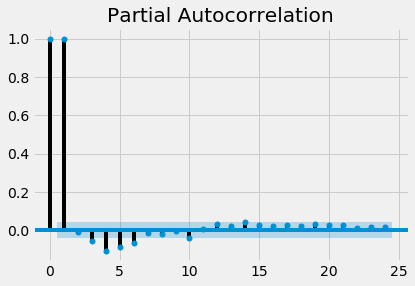

In [64]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

**Catatan** : Sama seperti autocorrelation, partial autocorrelation plots bisa sulit ditafsirkan, jadi mari kita uji pemahaman Anda tentang itu!

### Interpret partial autocorrelation plots

Jika nilai autokorelasi parsial mendekati 0, maka nilai antara pengamatan dan pengamatan lagged tidak berkorelasi satu sama lain. Sebaliknya, autokorelasi parsial dengan nilai mendekati 1 atau -1 menunjukkan bahwa ada korelasi positif atau negatif yang kuat antara pengamatan lagging dari time series.

Fungsi `.plot_pacf()` juga mengembalikan interval kepercayaan, yang direpresentasikan sebagai daerah berbayang biru. Jika nilai autokorelasi parsial berada di luar wilayah interval kepercayaan ini, maka Anda dapat mengasumsikan bahwa nilai autokorelasi parsial yang diamati adalah signifikan secara statistik.

Dalam plot autokorelasi parsial di bawah ini, di mana nilai lag yang kita miliki memiliki autokorelasi parsial yang signifikan secara statistik?

* 0, 1, 4, 5 and 6

<img src="images/ch3_pacf.png" width="500" align="left" />

## Seasonality, trend and noise in time series data

### Time series decomposition

Saat memvisualisasikan data time series, Anda harus melihat beberapa pola yang dapat dibedakan:

* **seasonality** : apakah data menampilkan pola periodik yang jelas?
* **trend** : apakah data mengikuti kemiringan ke atas atau ke bawah yang konsisten?
* **noise** : adakah poin outlier atau nilai yang hilang yang tidak konsisten dengan data lainnya?

Anda dapat mengandalkan metode yang dikenal sebagai time-series decomposition untuk secara otomatis mengekstraksi dan mengukur struktur data time series. Library `statsmodels` menyediakan fungsi `seasonal_decompose()` untuk melakukan dekomposisi time series di luar kotak.

`decomposition = sm.tsa.seasonal_decompose(time_series)`

Anda dapat mengekstraksi komponen tertentu, misalnya musim, dengan mengakses atribut `seasonal` dari objek dekomposisi.

In [54]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

                 co2
datestamp           
1958-03-29  1.028042
1958-04-05  1.235242
1958-04-12  1.412344
1958-04-19  1.701186
1958-04-26  1.950694
...              ...
2001-12-01 -0.525044
2001-12-08 -0.392799
2001-12-15 -0.134838
2001-12-22  0.116056
2001-12-29  0.285354

[2284 rows x 1 columns]


### Plot individual components

Dimungkinkan juga untuk mengekstrak jumlah yang disimpulkan lain dari objek dekomposisi deret waktu Anda. Kode berikut menunjukkan kepada Anda cara mengekstrak komponen yang observed, trend dan noise ( atau residu, `resid` ).

```python
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid
```

Anda kemudian dapat menggunakan komponen yang diekstraksi dan plot secara terpisah.

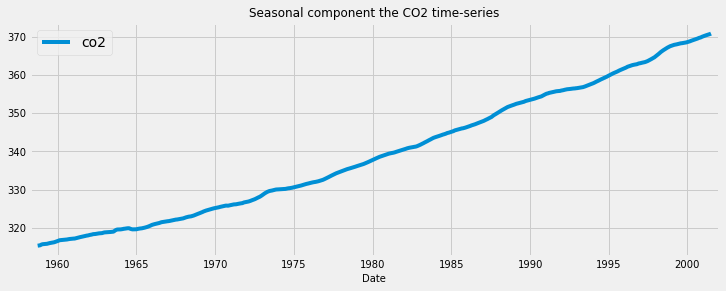

In [66]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(11, 4), fontsize=10)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Trend values the CO2 time-series', fontsize=12)
plt.show()

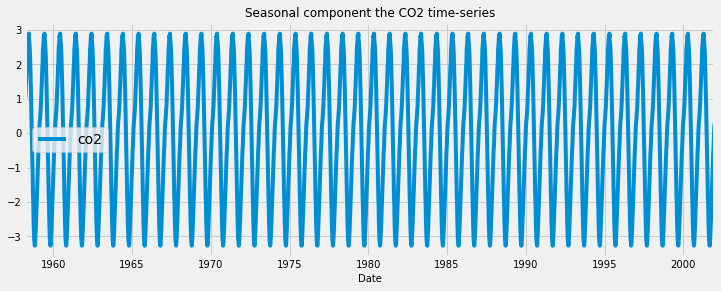

In [68]:
# Extract the trend component
seasonal = decomposition.seasonal

# Plot the values of the seasonal
ax = seasonal.plot(figsize=(11, 4), fontsize=10)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=12)
plt.show()

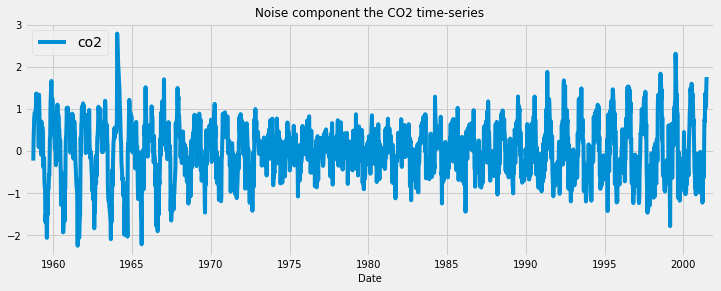

In [70]:
# Extract the trend component
resid = decomposition.resid

# Plot the values of the resid
ax = resid.plot(figsize=(11, 4), fontsize=10)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Noise component the CO2 time-series', fontsize=12)
plt.show()

## A quick review

* Visualize aggregates oftime series data
* Extract statistical summaries
* Autocorrelation and Partial autocorrelation
* Time series decomposition

### Visualize the airline dataset

Anda sekarang akan meninjau isi bab 1. Anda akan memiliki kesempatan untuk bekerja dengan dataset baru yang berisi jumlah bulanan penumpang yang mengambil penerbangan komersial antara Januari 1949 dan Desember 1960.

In [80]:
airline = pd.read_csv('datasets/ch3_airline_passengers.csv', parse_dates=['Month'], index_col=['Month'])

airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


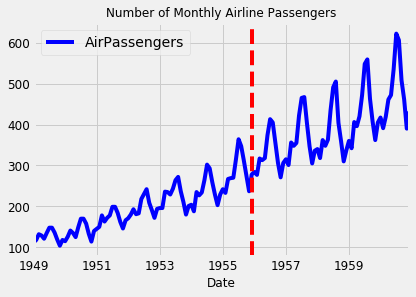

In [81]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

**Catatan** : Jumlah penumpang maskapai telah meningkat banyak dari waktu ke waktu. Dapatkah Anda menemukan pola yang menarik dalam time series ini?

### Analyze the airline dataset

Dalam Bab 2 Anda belajar:

* How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a `pandas` DataFrame.
* To generate boxplots of your data to quickly gain insight in your data.
* Display aggregate statistics of your data using `groupby()`.

Dalam latihan ini, Anda akan menerapkan semua konsep ini pada DataFrame `airline`.

In [84]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


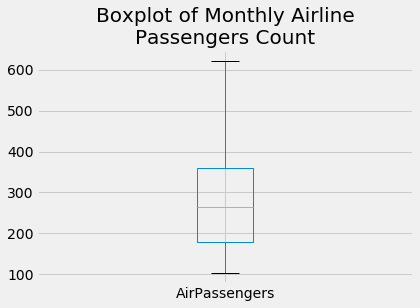

In [83]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

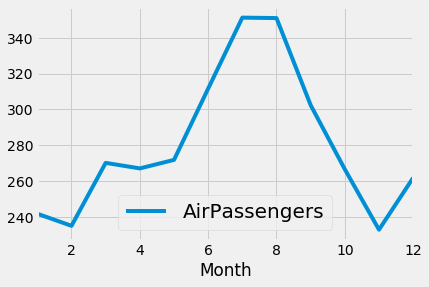

In [85]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

**Catatan** : Sepertinya Juli dan Agustus adalah bulan tersibuk!

### Time series decomposition of the airline dataset

Dalam latihan ini, Anda akan menerapkan time series decomposition ke dataset `airline`, dan memvisualisasikan komponen `trend` dan `seasonal`.

In [92]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [101]:
airline_decomposed = pd.merge(trend, seasonal, left_index=True, right_index=True)

            AirPassengers_x  AirPassengers_y
Month                                       
1949-01-01              NaN       -24.748737
1949-02-01              NaN       -36.188131
1949-03-01              NaN        -2.241162
1949-04-01              NaN        -8.036616
1949-05-01              NaN        -4.506313


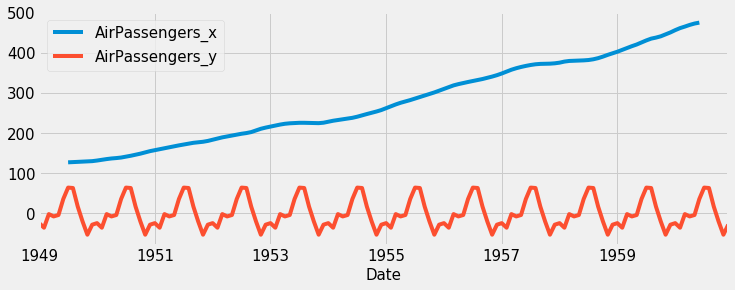

In [103]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(11, 4), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()